# Funde

* [Verteilung der Funde im Arbeitsgebiet](#Verteilung-der-Funde-im-Arbeitsgebiet)
* [Größenklassen nach Flusslauf](#Größenklassen-nach-Flusslauf)
* [Herkunft der Funde](#Herkunft-der-Funde-–-aus-Befund-vs.-Oberflächenabsammlung)
* [Nicht-keramische Funde](#nicht-keramische-Funde)

In [17]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde im Arbeitsgebiet

In [18]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Ort.ort_fluss,
           t_Ort.ort_lit,
           t_Obj.objID,
           t_Obj.Art,
           t_Obj.Anzahl,
           t_Obj.Gewicht
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) != '')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Gewicht kg'] = df['Gewicht'] / 1000
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,ort_name,ort_fluss,ort_lit,objID,Art,Anzahl,Gewicht,Gewicht kg
0,BAT,Batanga,Ubangi,DS,10,K,1.0,19.0,0.019
1,BAT,Batanga,Ubangi,DS,11,K,1.0,31.0,0.031
2,BAT,Batanga,Ubangi,DS,12,K,1.0,109.0,0.109
3,BAT,Batanga,Ubangi,DS,13,K,1.0,8.0,0.008
4,BAT,Batanga,Ubangi,DS,14,K,1.0,68.0,0.068


Anzahl Fundstücke je Fundkategorie:

In [19]:
df['Anzahl'].sum()

10518.0

nicht-keramische Funde (kg):

In [20]:
# ALTE VARIANTE
df_pivot3 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum)
df_pivot3 = pd.DataFrame(df_pivot3)
df_pivot3['Prozent'] = df_pivot3['Anzahl']/df_pivot3['Anzahl'].sum()*100
df_pivot3 = df_pivot3.sort_index(by=['Anzahl'], ascending=[False])
#df_pivot3

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


andere Variante davon:

In [21]:
#sql = """SELECT
#           t_Obj.objID,
#           t_Obj.Art
#       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
#           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID""".replace('\n',' ')
#
#df = pd.read_sql(sql, con)
#df.pivot_table(values = 'objID', index = 'Art', aggfunc = len)

insgesamt aufgenommenes Fundmaterial in Kilogramm:

In [22]:
df['Gewicht kg'].sum()

463.8796999999946

In [23]:
df_pivot = df.pivot_table(values = 'Gewicht kg', index = 'ort_fluss', columns = 'Art', aggfunc = sum)
df_pivot
df_pivot_RiverFind = df_pivot

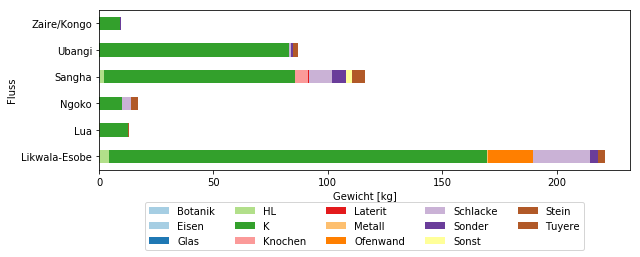

In [24]:
df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired', figsize=(9, 3))
plt.ylabel('Fluss')
plt.xlabel('Gewicht [kg]')
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=5, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/2-2_Funde_HerkunftFlusslauf.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

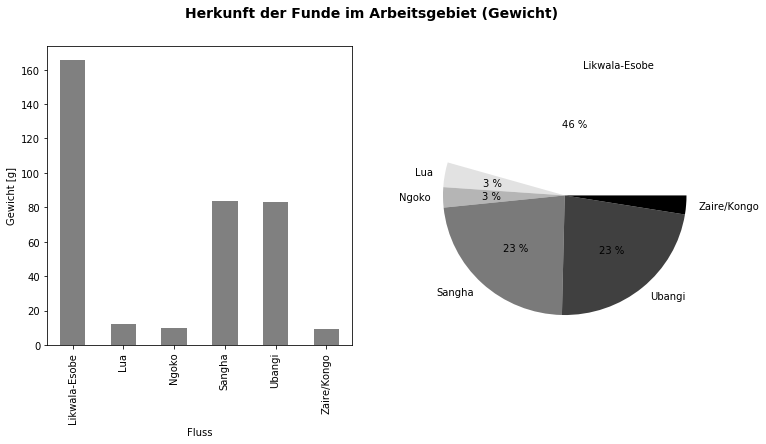

In [25]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)

df_pivot['K'].plot(kind = 'bar', stacked=True, color = 'grey')
plt.xlabel('Fluss')
plt.ylabel('Gewicht [g]')

plt.subplot(122)
df_pivot['K'].plot(kind='pie', autopct='%.0f %%', cmap = 'Greys')
plt.ylabel('')

plt.suptitle('Herkunft der Funde im Arbeitsgebiet (Gewicht)', fontsize=14, fontweight='bold')

plt.savefig('../output/figs/2-2_Funde_HerkunftFlusslauf_1.pdf', bbox_inches='tight')
plt.show()

Die Datenbasis muss vereinheitlicht werden, sollen verschiedene Fundkategorien aus der DB bezogen werden.

In [26]:
# Kreuztabelle mit summierter Anzahl
df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'ort_fluss', columns = 'Art', aggfunc = sum)

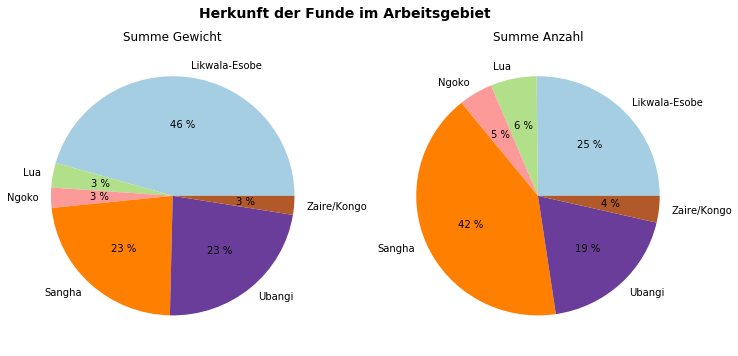

In [27]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)
df_pivot['K'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('Summe Gewicht')

plt.subplot(122)
df_pivot2['K'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('Summe Anzahl')

plt.suptitle('Herkunft der Funde im Arbeitsgebiet', fontsize=14, fontweight='bold')

plt.savefig('../output/figs/2-2_Funde_HerkunftFlusslauf_2.pdf', bbox_inches='tight')
plt.show()

In [28]:
# http://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('gray_r')
new_cmap = truncate_colormap(cmap, 0.2, 0.8)

In [29]:
df_pivot['K'].plot(kind='pie', autopct='%.0f %%', cmap=new_cmap, figsize = (6,6))
plt.ylabel('')
plt.savefig('../output/figs/2-2_Funde_HerkunftFlusslauf_3.pdf', bbox_inches='tight')
plt.show()

Kreuztabelle mit Summe der Scherbenanzahl je FdSt & Fluss:

In [30]:
df_pivot2 = df.pivot_table(values = 'Anzahl', index = ['ort_name', 'ort_fluss'], aggfunc = np.sum)
df_pivot2 = pd.DataFrame(df_pivot2)
# den von Pandas angelegten Mulit-Index auflösen
df_pivot2 = df_pivot2.reset_index()
display(df_pivot2.head())

,ort_name,ort_fluss,Anzahl
0,Balongoi,Ubangi,25.0
1,Bangui,Ubangi,1.0
2,Batanga,Ubangi,54.0
3,Bili,Sangha,6.0
4,Bobangi,Ubangi,45.0


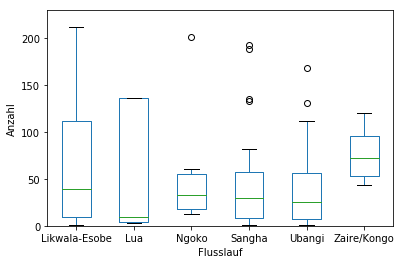

In [31]:
ax = df_pivot2.boxplot(column = 'Anzahl', by = 'ort_fluss')
plt.ylim([0,230])
plt.xlabel("Flusslauf")
plt.ylabel("Anzahl")
plt.title("")
plt.suptitle("")

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.savefig('../output/figs/2-2_Funde_HerkunftFlusslauf_3.pdf', bbox_inches='tight')
plt.show()

> **Funde** Anzahl der Funde im Arbeitsgebiet

Die Mittelwerte der Anzahl Fundstücke (alles!) je Fundstelle je Flusslauf:

In [32]:
df_pivot3 = df_pivot2.pivot_table(values = 'Anzahl', index = 'ort_fluss', aggfunc = np.mean)
df_pivot3 = pd.DataFrame(df_pivot3)
df_pivot3

,Anzahl
ort_fluss,
Likwala-Esobe,149.125000
Lua,131.250000
Ngoko,53.125000
Sangha,109.054054
Ubangi,38.302326
Zaire/Kongo,76.750000


Die Werte enthalten bislang aber auch noch die Grabungen – die Tabelle lässt also keine Aussage bezüglich den Surveyergebnissen zu!

In [33]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat = df_concat.sort_values('Anzahl', ascending=False)

# Summen-Zeile
df_concat.loc['Total']= df_concat.sum()
df_concat.loc['Total', 'Fundkategorie'] = 'SUM'

df_concat.to_latex('../output/tabs/2-2_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
4,Keramik,8468,80.5,363.33,78.3
9,Schlacke,1321,12.6,39.73,8.6
3,gebrannter Lehm,187,1.8,6.25,1.3
8,Ofenwand,182,1.7,19.88,4.3
10,Sonder,117,1.1,11.19,2.4
13,Tuyere,94,0.9,6.81,1.5
12,Stein,76,0.7,7.23,1.6
5,Knochen,29,0.3,5.93,1.3
1,Eisen,13,0.1,0.53,0.1
6,Laterit,11,0.1,0.08,0.0


In [34]:
df_concat['Gewicht (kg)'].sum() - df_concat.loc[4, 'Gewicht (kg)']

564.4099999999999

Summe mit Metallurgie in Zusammenhang stehender Funde (kg):

In [35]:
df_concat.loc[8, 'Gewicht (kg)'] + df_concat.loc[9, 'Gewicht (kg)'] + df_concat.loc[13, 'Gewicht (kg)']

66.42

## Vergleich Flusslauf: Km vs. Funde

In [36]:
df_1 = pd.read_csv("../data/base/1_SitesRiverKilometers.csv", index_col=0)
df_1['kmPCT'] = df_1['KM'] / df_1['KM'].sum() *100
df_1

,KM,kmPCT
RIVER,,
Ubangi,850,38.812785
Lua,100,4.566210
Sangha,600,27.397260
Ngoko,80,3.652968
Likwala-Esobe,500,22.831050
Zaire/Kongo,60,2.739726


In [37]:
# df_pivot_RiverFind = df_pivot_RiverFind.apply(pd.to_numeric)
# df_pivot_RiverFind = 

df_pivot_RiverFind['SUM'] = df_pivot_RiverFind.sum(axis = 1)
df_pivot_RiverFind['FindPCT'] = df_pivot_RiverFind['SUM'] / df_pivot_RiverFind['SUM'].sum() * 100
df_RiverFind = df_pivot_RiverFind[['SUM', 'FindPCT']]
df_RiverFind

Art,SUM,FindPCT
ort_fluss,,
Likwala-Esobe,221.0884,47.660719
Lua,12.9880,2.799864
Ngoko,17.1446,3.695915
Sangha,116.0508,25.017434
Ubangi,86.8239,18.716900
Zaire/Kongo,9.7840,2.109168


In [38]:
df_con = pd.concat([df_1, df_RiverFind], axis = 1)
df_con = df_con.sort_values(by = 'SUM', ascending = False)
df_con = df_con.rename(index={'Likwala-Esobe': 'Likwala-\naux-Herbes'})
df_con = df_con.rename(index={'Zaire/Kongo': 'Zaire\n(Kongo)'})

df_con

,KM,kmPCT,SUM,FindPCT
Likwala-\naux-Herbes,500,22.831050,221.0884,47.660719
Sangha,600,27.397260,116.0508,25.017434
Ubangi,850,38.812785,86.8239,18.716900
Ngoko,80,3.652968,17.1446,3.695915
Lua,100,4.566210,12.9880,2.799864
Zaire\n(Kongo),60,2.739726,9.7840,2.109168


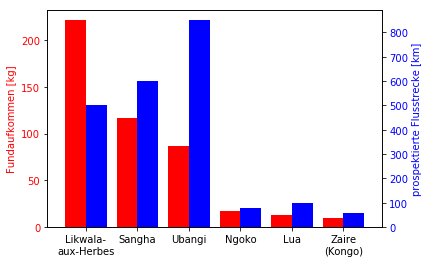

In [39]:
fig = plt.figure() # Create matplotlib figure
#fig = plt.figure(figsize = (5,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df_con['SUM'].plot(kind='bar', color='r', ax=ax, width=width, position=1)
df_con['KM'].plot(kind='bar', color='b', ax=ax2, width=width, position=0)

ax.set_ylabel('Fundaufkommen [kg]', color = 'r')
ax2.set_ylabel('prospektierte Flusstrecke [km]', color = 'b')

for tl in ax.get_yticklabels():
    tl.set_color('r')

for tl in ax2.get_yticklabels():
    tl.set_color('b')

ax.set_xticklabels(df_con.index, rotation=0)
plt.xlim([-0.75,len(df_con)-0.25])

plt.savefig('../output/figs/2-2_FundeGewicht_FlussKM.pdf', bbox_inches='tight')
plt.show()

### Größenklassen nach Flusslauf

In [40]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_fluss,
           t_Obj.objID,
           t_Obj.Art,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) != '')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')


df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,ort_fluss,objID,Art,Anzahl,Gr_Clist
0,BAT,Ubangi,10,K,1.0,70
1,BAT,Ubangi,11,K,1.0,70
2,BAT,Ubangi,12,K,1.0,120
3,BAT,Ubangi,13,K,1.0,70
4,BAT,Ubangi,14,K,1.0,120


In [41]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'ort_fluss', columns = 'Gr_Clist', aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.fillna(0)
df_pivot.to_latex('../output/tabs/2-2_Funde_Fragmentierung.tex')
df_pivot

Gr_Clist,30,70,120,200,500,
ort_fluss,,,,,,
Likwala-Esobe,942.0,1331.0,398.0,132.0,41.0,735.0
Lua,58.0,156.0,37.0,3.0,0.0,271.0
Ngoko,13.0,174.0,59.0,8.0,0.0,171.0
Sangha,1268.0,1396.0,219.0,35.0,13.0,1104.0
Ubangi,44.0,678.0,212.0,46.0,9.0,657.0
Zaire/Kongo,7.0,69.0,25.0,5.0,0.0,201.0


> das Gr_Clist wirft in LateX eine Fehlermeldung aus, daher:

In [42]:
df.pivot_table(values = 'Anzahl', index = 'ort_fluss', columns = 'Gr_Clist', aggfunc = np.sum).reset_index().to_latex('../output/tabs/2-2_Funde_Fragmentierung_B.tex', index = False)

> **Funde** Fragmentierung bezogen auf die Fundregion/den Flusslauf

Es wird ersichtlich, das die meisten großen Gef.-Fragmente und ganzen Gefäße vom Likwala stammen; daher ist dieser Flusslauf bezogen auf das Gewicht auch so stark vertreten

### Herkunft der Funde – aus Befund *vs.* Oberflächenabsammlung

> ToDo: Abfragen ändern; siehe 2.1 Befunde

In [43]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Anzahl,
           t_Obj.Gewicht        
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Komplex.bef_nr) Not Like '%0%')
           AND ((t_Ort.ort_kurz) Not Like '%SGH%')
           AND ((t_Ort.ort_kurz) Not Like '%UBA%')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

# Liste der Funde aus Befunden
df1 = pd.read_sql(sql, con)
df1['Anzahl'] = df1['Anzahl'].convert_objects(convert_numeric=True)
df1['Gewicht'] = df1['Gewicht'].convert_objects(convert_numeric=True)


sql = """SELECT
           t_Obj.objID, 
           t_Obj.Anzahl,
           t_Obj.Gewicht        
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Komplex.bef_nr) like '%0%')
           OR ((t_Ort.ort_kurz) Like '%SGH%')
           OR ((t_Ort.ort_kurz) Like '%UBA%')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

# Liste der Funde aus Oberflächenabsammlungen
df2 = pd.read_sql(sql, con)
df2['Anzahl'] = df2['Anzahl'].convert_objects(convert_numeric=True)
df2['Gewicht'] = df2['Gewicht'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [44]:
# bezogen aufs Gewicht
a = pd.Series({'Grabung':np.sum(df1['Gewicht']),'Oberflächen-\nabsammlung':np.sum(df2['Gewicht'])})
a

Grabung                     142977.0
Oberflächen-\nabsammlung    326633.7
dtype: float64

In [45]:
# bezogen auf die Anzahl
b = pd.Series({'Grabung':np.sum(df1['Anzahl']),'Oberflächen-\nabsammlung':np.sum(df2['Anzahl'])})
b

Grabung                     4711.0
Oberflächen-\nabsammlung    5839.0
dtype: float64

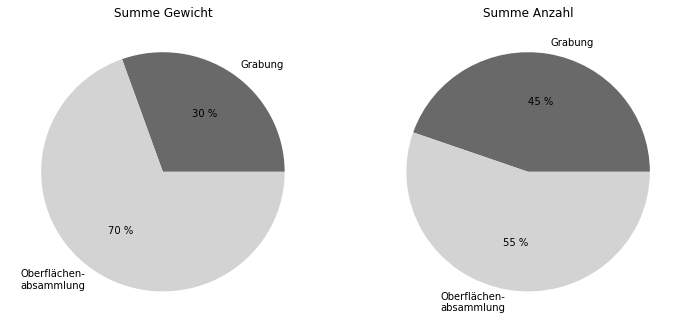

In [46]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)
a.plot(kind='pie', autopct='%.0f %%', colors = ('dimgrey', 'lightgrey'))
plt.ylabel('')
plt.title('Summe Gewicht')

plt.subplot(122)
b.plot(kind='pie', autopct='%.0f %%', colors = ('dimgrey', 'lightgrey'))
plt.ylabel('')
plt.title('Summe Anzahl')

plt.savefig('../output/figs/2-2_Funde_Grabung.pdf', bbox_inches='tight')
plt.show()

> **Funde** Herkunft der Funde im Arbeitsgebiet

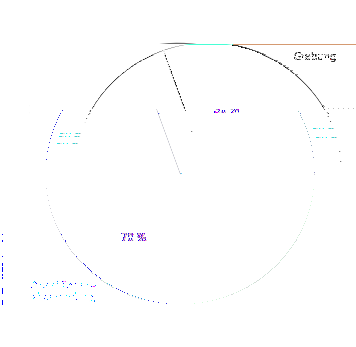

In [47]:
a.plot(kind='pie', autopct='%.0f %%', colors = ('dimgrey', 'lightgrey'), figsize = (6,6))
plt.ylabel('')
plt.savefig('../output/figs/2-2_Funde_Grabung2.pdf', bbox_inches='tight')
plt.show()

## nicht-keramische Funde

In [48]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Ort.ort_fluss,
           t_Ort.ort_lit,
           t_Obj.objID,
           t_Obj.Art,
           t_Obj.Anzahl,
           t_Obj.Gewicht
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) != 'K')
           AND ((t_Obj.Art) != 'Sonder')
           AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df['Gewicht'] = pd.to_numeric(df['Gewicht'])
df['Gewicht kg'] = df['Gewicht'] / 1000

In [49]:
df_table = pd.read_csv('../data/processed/10_TafNr-objID_Liste.csv')
df_table_sub = df_table[['objID','TAF','OBJ']]

df_merge = pd.merge(df, df_table_sub, on = 'objID', how='inner')
df_merge.sort_values(by = ['TAF', 'OBJ'])

,ort_kurz,ort_name,ort_fluss,ort_lit,objID,Art,Anzahl,Gewicht,Gewicht kg,TAF,OBJ
0,GBA,Gbandami,Ubangi,DS,118,Metall,1.0,33.0,0.033,23,9
7,PIK,Pikunda,Sangha,DS,2702,Eisen,1.0,10.0,0.010,47,18
9,YUM,Yumba,Likwala-Esobe,DS,6321,Eisen,1.0,24.0,0.024,75,8
8,MUN,Munda,Likwala-Esobe,DS,3259,Schlacke,4.0,4.0,0.004,91,1
1,OUE,Ouesso,Sangha,DS,2118,Stein,1.0,1014.0,1.014,98,1
2,OUE,Ouesso,Sangha,DS,2119,Stein,5.0,605.0,0.605,98,2
3,OUE,Ouesso,Sangha,DS,2119,Stein,5.0,605.0,0.605,98,3
4,OUE,Ouesso,Sangha,DS,2119,Stein,5.0,605.0,0.605,98,4
5,OUE,Ouesso,Sangha,DS,2119,Stein,5.0,605.0,0.605,98,5
6,OUE,Ouesso,Sangha,DS,2119,Stein,5.0,605.0,0.605,98,6


In [50]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat = df_concat.sort_values('Anzahl', ascending=False)

# Summen-Zeile
df_concat.loc['Total']= df_concat.sum()
df_concat.loc['Total', 'Fundkategorie'] = 'SUM'

#df_concat.to_latex('../output/tabs/2-2_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
8,Schlacke,1321,68.3,39.73,44.5
3,gebrannter Lehm,187,9.7,6.25,7.0
7,Ofenwand,182,9.4,19.88,22.2
11,Tuyere,94,4.9,6.81,7.6
10,Stein,76,3.9,7.23,8.1
4,Knochen,29,1.5,5.93,6.6
1,Eisen,13,0.7,0.53,0.6
5,Laterit,11,0.6,0.08,0.1
9,Sonst,7,0.4,2.52,2.8
2,Glas,6,0.3,0.01,0.0


Gewicht (kg) von Funden, die mit Metallurgie in Zusammenhang stehen:

In [51]:
a = df_concat['Gewicht (kg)'].loc[df_concat['Fundkategorie'].isin(['Schlacke', 'gebrannter Lehm', 'Ofenwand', 'Tuyere'])].sum()
a

72.67

Anteil:

In [52]:
# Summe der Spalte abzüglich der in pivot hinzugefügten Summenzeile:
b = (df_concat['Gewicht (kg)'].sum() - df_concat['Gewicht (kg)'].loc[df_concat['Fundkategorie'] == 'SUM'])

In [53]:
a / b * 100

Total    81.331841
Name: Gewicht (kg), dtype: float64

## Ofenwand

In [54]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_komplex.bef_nr,
           t_Ort.ort_lit,
           t_Obj.objID,
           t_Obj.Art,
           t_Obj.Anzahl,
           t_Obj.Gewicht
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Notiz) Not Like '%1987%')
           AND ((t_Obj.Art) = 'Ofenwand')
           OR ((t_Obj.Art) = 'HL'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df['Gewicht'] = pd.to_numeric(df['Gewicht'])
df['Gewicht kg'] = df['Gewicht'] / 1000

In [55]:
df.pivot_table(values = 'Gewicht kg', index = 'Art', aggfunc = sum, fill_value = 0)

Art
HL           6.250
Ofenwand    19.875
Name: Gewicht kg, dtype: float64

In [56]:
df.pivot_table(values = 'Gewicht kg', index = 'ort_name', aggfunc = sum, fill_value = 0)

ort_name
Bobusa           0.243
Dama 1           0.000
Maluba           0.495
Mbati-Ngombe     0.000
Munda           23.861
Ngama            0.095
Pikunda          1.431
Name: Gewicht kg, dtype: float64

In [57]:
df.loc[df['ort_name'] == 'Munda'].pivot_table(values = 'Gewicht kg', index = 'bef_nr', aggfunc = sum, fill_value = 0)

bef_nr
87/1         1.554
87/2-1-1    20.286
87/2-1-3     2.021
87/3         0.000
Name: Gewicht kg, dtype: float64

## Tuyère

In [58]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_komplex.bef_nr,
           t_Ort.ort_lit,
           t_Obj.objID,
           t_Obj.Art,
           t_Obj.Anzahl,
           t_Obj.Gewicht
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Notiz) Not Like '%1987%')
           AND ((t_Obj.Art) = 'Tuyere'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df['Gewicht'] = pd.to_numeric(df['Gewicht'])
df['Gewicht kg'] = df['Gewicht'] / 1000

In [59]:
df.pivot_table(values = 'Anzahl', index = 'ort_name', aggfunc = sum, fill_value = 0)

ort_name
Bonga         1
Maoko         3
Munda        61
Ngama         8
Ngbanja       2
Ngwangala     2
Ouesso        5
Pandama       8
Pikunda       2
Ponga         1
Yengo         1
Name: Anzahl, dtype: int64

In [60]:
df.loc[df['ort_name'] == 'Munda'].pivot_table(values = 'Anzahl', index = 'bef_nr', aggfunc = sum, fill_value = 0)

bef_nr
87/1         7
87/101       2
87/2-1-1    14
87/3        38
Name: Anzahl, dtype: int64

## Stein

In [61]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_komplex.bef_nr,
           t_Ort.ort_lit,
           t_Obj.objID,
           t_Obj.Art,
           t_Obj.Anzahl,
           t_Obj.Gewicht
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Notiz) Not Like '%1987%')
           AND ((t_Obj.Art) = 'Stein'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df['Gewicht'] = pd.to_numeric(df['Gewicht'])
df['Gewicht kg'] = df['Gewicht'] / 1000

In [62]:
a = df.pivot_table(values = 'Anzahl', index = 'ort_name', aggfunc = sum, fill_value = 0)
a

ort_name
Bobusa                   3
Bokonongo                2
Boleko                   1
Bomasa                   1
Bonda                    1
Leme                     1
Likwala-Esobe km 186     1
Maluba                   3
Mosanya                  1
Motenge-Boma             1
Motoli                   1
Munda                    1
Ndengu                  10
Ngoko Fkm 17 (Elali)     1
Ouesso                   6
Pikunda                 34
Sakao                    6
Sangha Fkm 271           2
Name: Anzahl, dtype: int64

In [63]:
len(a)

18